In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('Solar Dataset_Solar from MEDA-1.XLSX', sheet_name='Non_gap_filled_10min_data')

In [ ]:
df.head(5)


,#date time,el,az,ghi,ghi_flag,dni,dni_flag,dhi,dhi_flag,ws,...,rh,rh_flag,press,press_flag,precip,precip_flag,dp,dp_flag,wb,wb_flag
0,2019-06-18 00:00:00,-45.2,353.6,0,10004,0,10004,00:00:00,10004,1.5,...,47,10000,967,10000,0,10000,20.3,10000,24.2,10000
1,2019-06-18 00:10:00,-45.4,356.8,0,10004,0,10004,00:00:00,10004,1.5,...,47,10000,967,10000,0,10000,20.4,10000,24.2,10000
2,2019-06-18 00:20:00,-45.5,180.1,0,10004,0,10004,00:00:00,10004,2.2,...,48,10000,967,10000,0,10000,20.6,10000,24.3,10000
3,2019-06-18 00:30:00,-45.4,3.4,0,10004,0,10004,00:00:00,10004,1.9,...,49,10000,967,10000,0,10000,20.7,10000,24.3,10000
4,2019-06-18 00:40:00,-45.2,6.6,0,10004,0,10004,00:00:00,10004,1.4,...,49,10000,967,10000,0,10000,20.8,10000,24.4,10000


In [ ]:
df.drop(columns=['ghi_flag', 'dni_flag','dhi_flag','rh_flag','press_flag', 'precip_flag','dp_flag','wb_flag','ws_flag','maxws_flag','wd_flag','airtemp_flag','ghi'],inplace=True)


In [ ]:
df.dropna(inplace=True)
df.replace(' NaN',0,inplace=True)

In [ ]:
df.isnull().sum()

#date time    0
el            0
az            0
dni           0
dhi           0
ws            0
maxws         0
wd            0
airtemp       0
rh            0
press         0
precip        0
dp            0
wb            0
dtype: int64

In [ ]:
df.head(5)

,#date time,el,az,dni,dhi,ws,maxws,wd,airtemp,rh,press,precip,dp,wb
0,2019-06-18 00:00:00,-45.2,353.6,0,00:00:00,1.5,3.5,200,32.9,47,967,0.0,20.3,24.2
1,2019-06-18 00:10:00,-45.4,356.8,0,00:00:00,1.5,3.3,196,32.8,47,967,0.0,20.4,24.2
2,2019-06-18 00:20:00,-45.5,180.1,0,00:00:00,2.2,4.4,194,32.6,48,967,0.0,20.6,24.3
3,2019-06-18 00:30:00,-45.4,3.4,0,00:00:00,1.9,5.3,202,32.6,49,967,0.0,20.7,24.3
4,2019-06-18 00:40:00,-45.2,6.6,0,00:00:00,1.4,2.8,203,32.6,49,967,0.0,20.8,24.4


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52772 entries, 0 to 52771
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   #date time  52772 non-null  datetime64[ns]
 1   el          52772 non-null  float64       
 2   az          52772 non-null  float64       
 3   dni         52772 non-null  int64         
 4   dhi         52772 non-null  object        
 5   ws          52772 non-null  float64       
 6   maxws       52772 non-null  float64       
 7   wd          52772 non-null  int64         
 8   airtemp     52772 non-null  float64       
 9   rh          52772 non-null  int64         
 10  press       52772 non-null  int64         
 11  precip      52772 non-null  float64       
 12  dp          52772 non-null  float64       
 13  wb          52772 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(4), object(1)
memory usage: 5.6+ MB


In [ ]:
#df['ghi'] = df['ghi'].astype(float)
df['dni'] = df['dni'].astype(float)
#df['dhi'] = df['dhi'].astype(float)
df['ws'] = df['ws'].astype(float)
df['maxws'] = df['maxws'].astype(float)
df['wd'] = df['wd'].astype(float)
df['airtemp'] = df['airtemp'].astype(float)
df['rh'] = df['rh'].astype(float)
df['press'] = df['press'].astype(float)
df['precip'] = df['precip'].astype(float)
df['dp'] = df['dp'].astype(float)
df['wb'] = df['wb'].astype(float)


In [ ]:
df.drop(columns=['dhi'],inplace=True)

In [ ]:
df.head(5)

,#date time,el,az,dni,ws,maxws,wd,airtemp,rh,press,precip,dp,wb
0,2019-06-18 00:00:00,-45.2,353.6,0.0,1.5,3.5,200.0,32.9,47.0,967.0,0.0,20.3,24.2
1,2019-06-18 00:10:00,-45.4,356.8,0.0,1.5,3.3,196.0,32.8,47.0,967.0,0.0,20.4,24.2
2,2019-06-18 00:20:00,-45.5,180.1,0.0,2.2,4.4,194.0,32.6,48.0,967.0,0.0,20.6,24.3
3,2019-06-18 00:30:00,-45.4,3.4,0.0,1.9,5.3,202.0,32.6,49.0,967.0,0.0,20.7,24.3
4,2019-06-18 00:40:00,-45.2,6.6,0.0,1.4,2.8,203.0,32.6,49.0,967.0,0.0,20.8,24.4


In [ ]:
corr = df.corr(method = 'spearman')

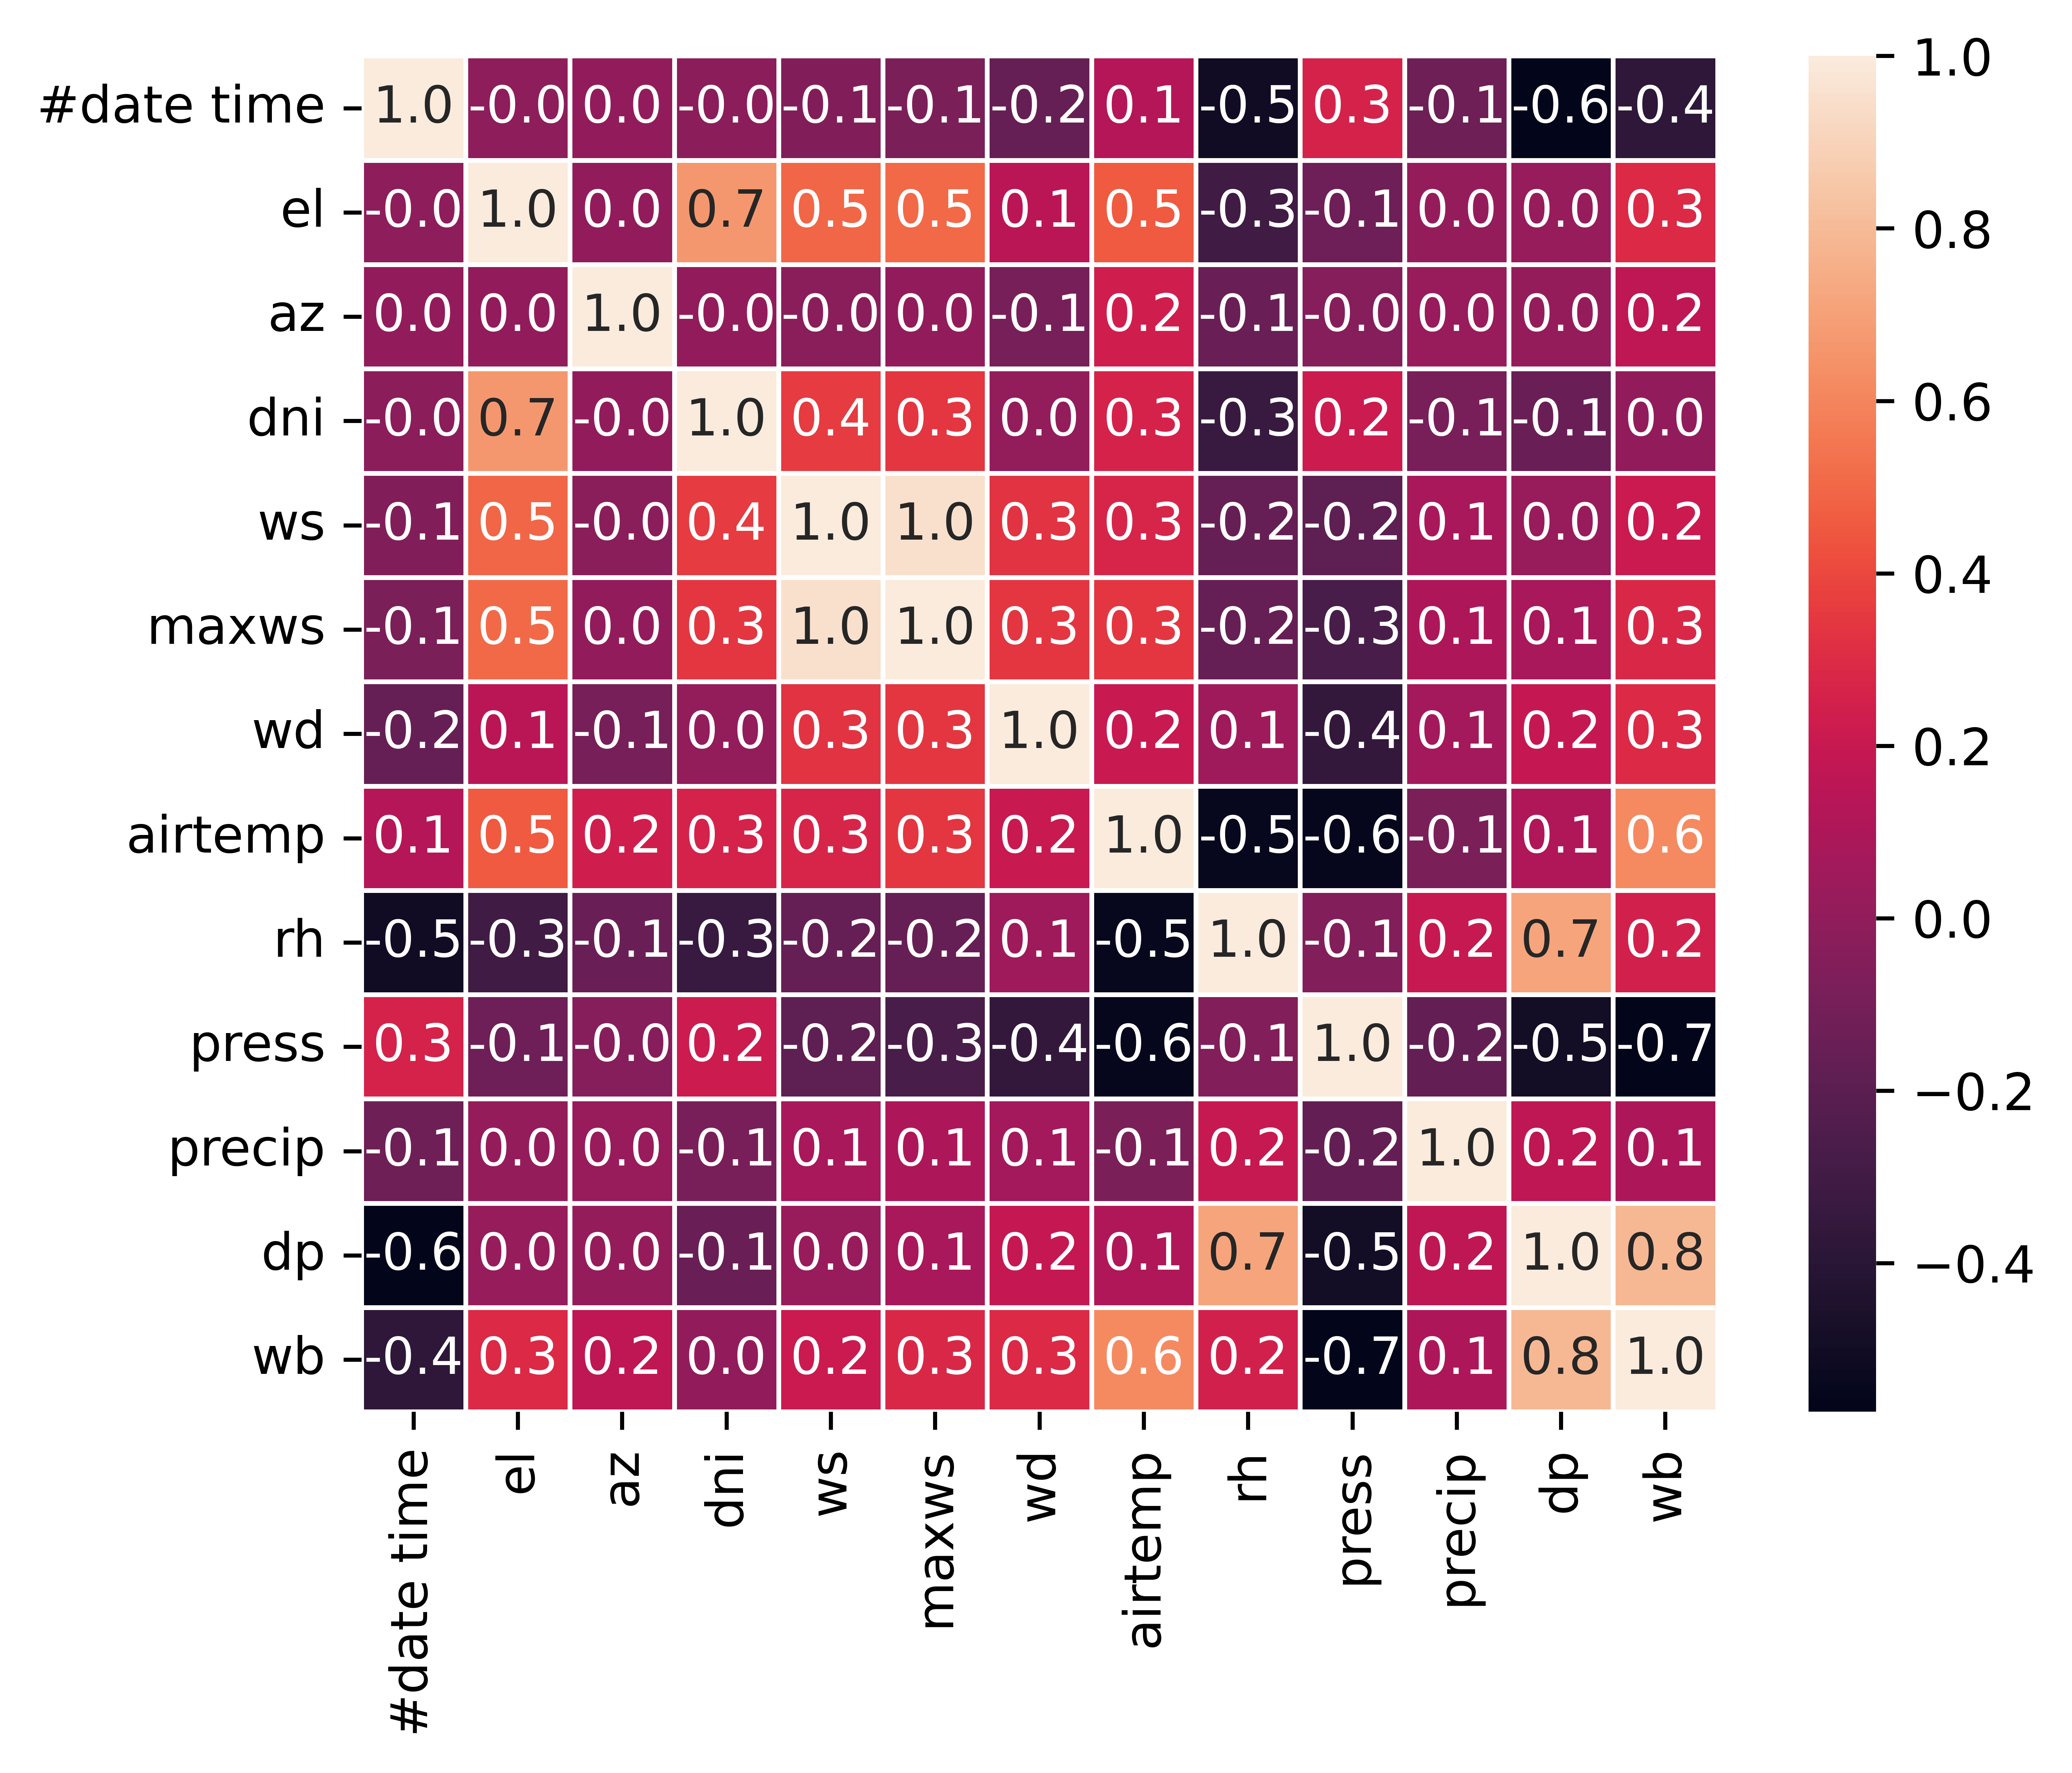

In [ ]:
plt.figure(dpi=1000)
sns.heatmap(corr, robust=True, annot=True, fmt='0.1f', linewidths=.9, square=True)
plt.show()

In [ ]:
df['#date time']= pd.to_datetime(df['#date time'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.head(2)

,#date time,el,az,dni,ws,maxws,wd,airtemp,rh,press,precip,dp,wb
0,2019-06-18 00:00:00,-45.2,353.6,0.0,1.5,3.5,200.0,32.9,47.0,967.0,0.0,20.3,24.2
1,2019-06-18 00:10:00,-45.4,356.8,0.0,1.5,3.3,196.0,32.8,47.0,967.0,0.0,20.4,24.2


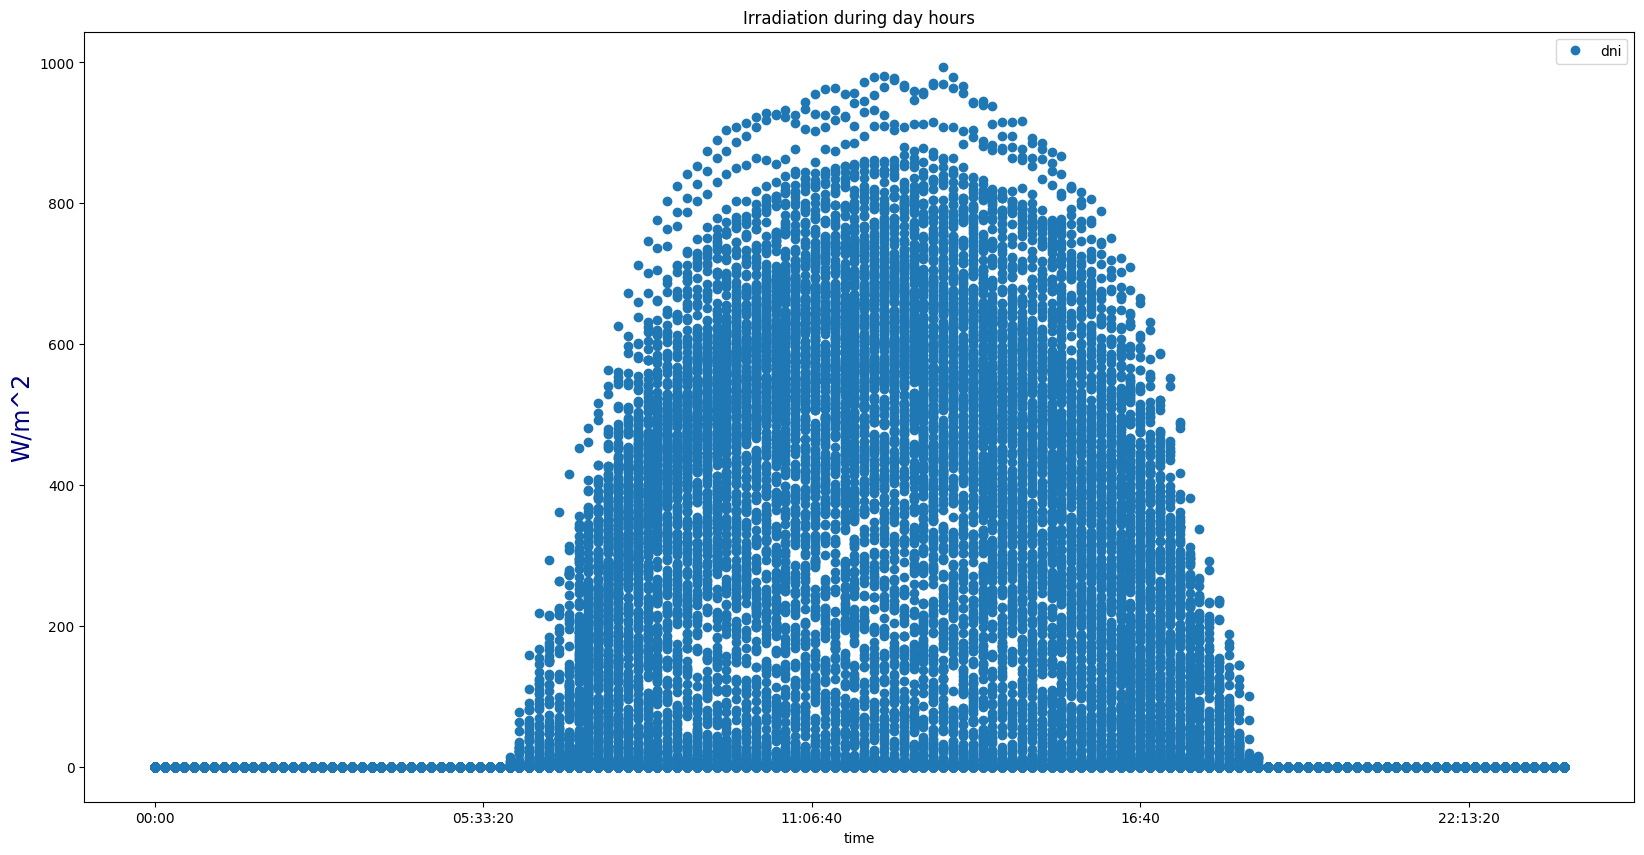

In [ ]:
df_sens=df.groupby('#date time').sum().reset_index()
df_sens['time']=df['#date time'].dt.time

fig,ax = plt.subplots(ncols=1,nrows=1,dpi=100,figsize=(20,10))
# daily yield plot
df_sens.plot(x='time',y='dni',ax=ax,style='o')

ax.set_title('Irradiation during day hours',)

ax.set_ylabel('W/m^2',color='navy',fontsize=17)



plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['el', 'az', 'wb', 'precip', 'press', 'dp', 'rh', 'airtemp', 'ws', 'maxws']]
#y =df['dni']
max_y = df['dni'].max()
y = df['dni']/max_y

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
y

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
52767    0.225352
52768    0.100604
52769    0.009054
52770    0.238431
52771    0.315895
Name: dni, Length: 52772, dtype: float64

# SVM MODEL

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df, X, and y are defined as in your original code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Reshape input data to 3D for LSTM (samples, time steps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define BiLSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

Epoch 1/50
1056/1056 [==============================] - 19s 10ms/step - loss: 0.0171 - val_loss: 0.0144
Epoch 2/50
1056/1056 [==============================] - 9s 9ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 3/50
1056/1056 [==============================] - 10s 9ms/step - loss: 0.0124 - val_loss: 0.0133
Epoch 4/50
1056/1056 [==============================] - 10s 9ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 5/50
1056/1056 [==============================] - 9s 9ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 6/50
1056/1056 [==============================] - 9s 8ms/step - loss: 0.0110 - val_loss: 0.0114
Epoch 7/50
1056/1056 [==============================] - 10s 9ms/step - loss: 0.0108 - val_loss: 0.0112
Epoch 8/50
1056/1056 [==============================] - 9s 9ms/step - loss: 0.0105 - val_loss: 0.0107
Epoch 9/50
1056/1056 [==============================] - 9s 8ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 10/50
1056/1056 [==============================] - 9s 8ms/step - loss: 

In [ ]:
# Predict DNI values using the trained model
import pandas as pd
y_pred = model.predict(X_test_scaled)

# Inverse transform the scaled DNI predictions to get the actual DNI values
y_pred_actual = y_pred * max_y
y_test_actual = y_test * max_y
y_pred_actual = y_pred_actual.flatten()
#y_test_actual = y_test_actual.flatten()
import pandas as pd

# Create a DataFrame to store predicted and actual DNI values
dni_comparison = pd.DataFrame({
    'Predicted DNI': y_pred_actual,
    'Actual DNI': y_test_actual
})

# Print the DataFrame
dni_comparison.head(15)

330/330 [==============================] - 3s 3ms/step


,Predicted DNI,Actual DNI
47798,1.959980,0.0
51521,5.173901,0.0
41963,455.415253,466.0
47886,38.381706,0.0
3112,185.734329,575.0
34866,2.179853,0.0
7078,2.118148,0.0
23862,20.455633,5.0
36740,1.715934,0.0
32159,214.311859,352.0


In [ ]:
dni_comparison.head(15)

,Predicted DNI,Actual DNI
46279,264.215988,561.0
3800,364.643222,508.0
48462,-60.959638,2.0
14009,98.136469,0.0
36319,-79.114408,0.0
1852,-5.296548,0.0
9452,221.221247,462.0
35592,-76.365297,0.0
35536,12.344637,0.0
13334,211.015748,701.0


GHI PRediction form Predicted DNI

In [ ]:
df = pd.read_excel('Solar Dataset_Solar from MEDA-1.XLSX', sheet_name='Non_gap_filled_10min_data')
df.dropna(inplace=True)
df.replace(' NaN',0,inplace=True)
df.isnull().sum()

#date time      0
el              0
az              0
ghi             0
ghi_flag        0
dni             0
dni_flag        0
dhi             0
dhi_flag        0
ws              0
ws_flag         0
maxws           0
maxws_flag      0
wd              0
wd_flag         0
airtemp         0
airtemp_flag    0
rh              0
rh_flag         0
press           0
press_flag      0
precip          0
precip_flag     0
dp              0
dp_flag         0
wb              0
wb_flag         0
dtype: int64

In [ ]:
df['ghi'] = df['ghi'].astype(float)
df['dni'] = df['dni'].astype(float)
#df['dhi'] = df['dhi'].astype(float)
df['ws'] = df['ws'].astype(float)
df['maxws'] = df['maxws'].astype(float)
df['wd'] = df['wd'].astype(float)
df['airtemp'] = df['airtemp'].astype(float)
df['rh'] = df['rh'].astype(float)
df['press'] = df['press'].astype(float)
df['precip'] = df['precip'].astype(float)
df['dp'] = df['dp'].astype(float)
df['wb'] = df['wb'].astype(float)

In [ ]:
X2 = df[['el', 'az', 'wb', 'precip', 'press', 'dp', 'rh', 'airtemp', 'ws', 'maxws','dni']]
X3 = df[['el', 'az', 'wb', 'precip', 'press', 'dp', 'rh', 'airtemp', 'ws', 'maxws']]
#y =df['dni']
max_y2 = df['ghi'].max()
y2 = df['ghi']/max_y2

In [ ]:
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

In [ ]:
X2['dni'] = model.predict(X3)

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'forward_lstm' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'forward_lstm' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


Model

In [ ]:
# prompt: draw necessary graph for bilstm

import matplotlib.pyplot as plt

# Plot the training and testing loss
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the actual and predicted values
plt.plot(y_test, label='Actual Values')
plt.plot(model.predict(X_test), label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()
plt.show()

KeyError: 'loss'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm.fit(X_train_scaled, y_train)

# Evaluating the model
train_score = svm.score(X_train_scaled, y_train)
test_score = svm.score(X_test_scaled, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.924519496796701
Test Score: 0.9225629261271111


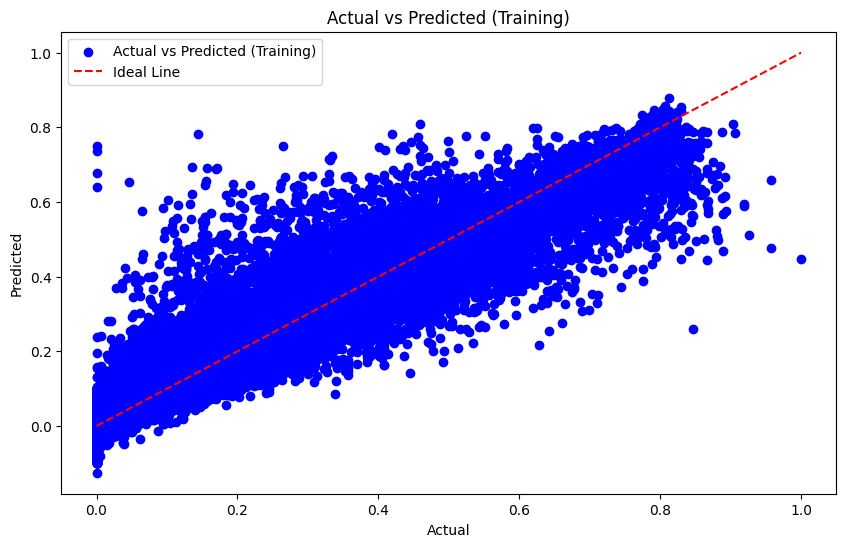

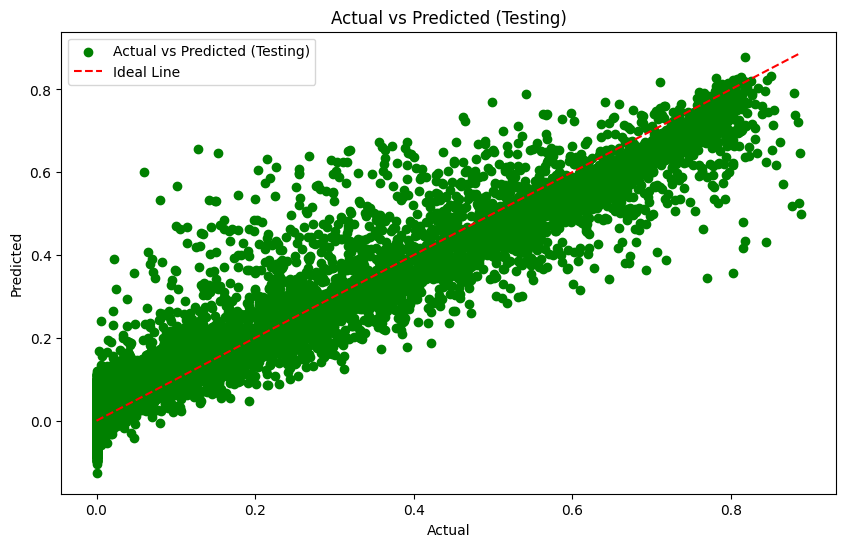

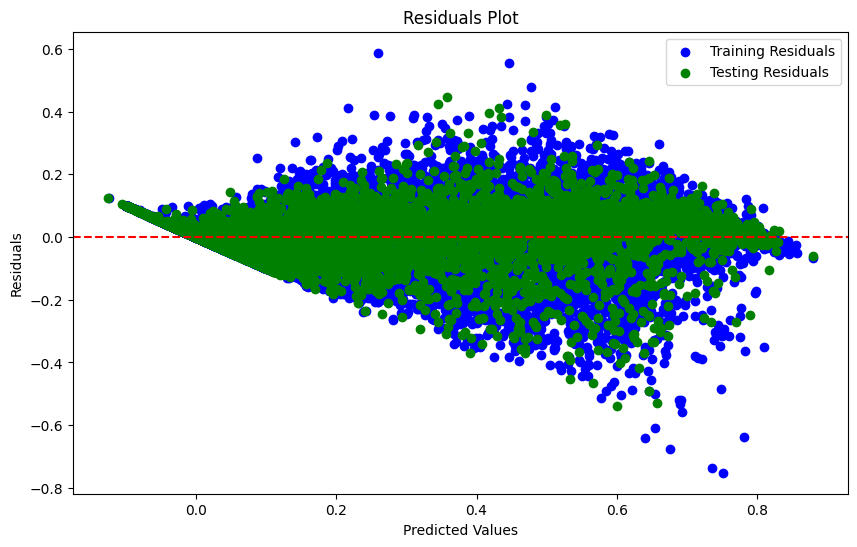

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

# Plotting actual vs predicted for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted (Training)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Plotting actual vs predicted for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted (Testing)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Plotting residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, train_residuals, color='blue', label='Training Residuals')
plt.scatter(y_test_pred, test_residuals, color='green', label='Testing Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

